In [1]:
import matplotlib.gridspec as gds, matplotlib.pyplot as plt, numpy as np, pandas as pd
from datetime import datetime
from pandas_datareader import data as web

In [3]:
s = datetime(2010, 1, 1)
e = datetime(2017, 12, 31)
hk1234 = web.DataReader('1234.HK', 'yahoo', s, e)

In [4]:
hk1234.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5.40,5.40,5.40,5.40,3.777523,0.0
2010-01-05,5.61,5.69,5.44,5.58,3.903440,5676900.0
2010-01-06,5.53,5.99,5.53,5.98,4.183256,9938400.0


In [5]:
def moving_avg(price, n=20, method='EMA'):
    if method == 'EMA':
        ma = price.ewm(min_periods=0, adjust=True, ignore_na=False, com=n).mean()
        ma = ma.rename('EMA({0})'.format(str(n)))
    elif method == 'SMA':
        ma = price.rolling(center=False, window=n).mean()
        ma = ma.rename('SMA({0})'.format(str(n)))
    elif method == 'WMA':
        pass
    return ma

In [6]:
def dmac(assest, sw=50, lw=100):
    positions = [0]
    principals = [100000]
    for i in range(len(assest)):
        if i < lw:
            continue
        short_mavg = assest['Adj Close'][i-50:i].mean()
        long_mavg = assest['Adj Close'][i-100:i].mean()
        if short_mavg > long_mavg:
            number_of_shares = int(principals[-1]/assest['Adj Close'][i])
            position = positions[-1] + number_of_shares
            principal = principals[-1] - number_of_shares * assest['Adj Close'][i]
            positions.append(position)
            principals.append(principal)
        elif short_mavg < long_mavg and positions[-1] != 0:
            profit = positions[-1] * assest['Adj Close'][i]
            principal = principals[-1] + profit
            positions.append(0)
            principals.append(principal)
        else:
            positions.append(positions[-1])
            principals.append(principals[-1])
    return positions, principals

In [7]:
positions, principals = dmac(hk1234)

In [8]:
hk1234_v2 = hk1234[100:].copy()
hk1234_v2['positions'] = positions[:-1]
hk1234_v2['principals'] = principals[:-1]

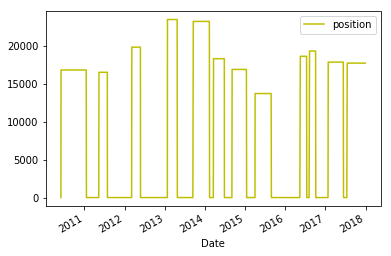

In [9]:
hk1234_v2['positions'].plot(label='position', c='y')
plt.legend()
plt.show()

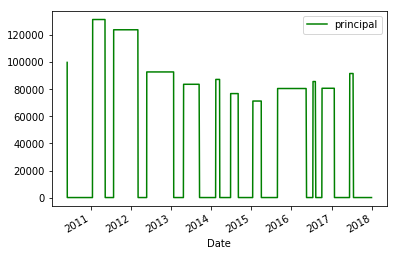

In [10]:
hk1234_v2['principals'].plot(label='principal', c='g')
plt.legend()
plt.show()

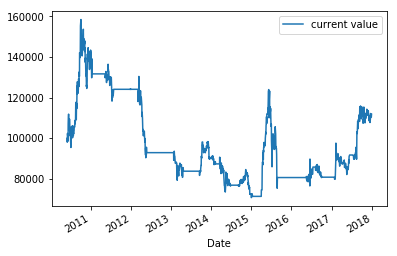

In [11]:
hk1234_v2['current value'] = hk1234_v2['principals'] + hk1234_v2['Adj Close'] * hk1234_v2['positions']
hk1234_v2['current value'].plot(label='current value')
plt.legend()
plt.show()

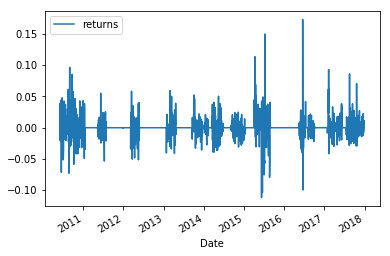

In [12]:
hk1234_v2['returns'] = hk1234_v2['current value'].pct_change()
hk1234_v2['returns'].plot(label='returns')
plt.legend()
plt.show()

In [14]:
(hk1234_v2['current value'][-1] - hk1234_v2['current value'][0])/hk1234_v2['current value'][0]

0.11855203431000104

In [15]:
hk1234_v2['MA50'] = moving_avg(hk1234['Adj Close'], n=50, method='SMA')
hk1234_v2['MA200'] = moving_avg(hk1234['Adj Close'], n=100, method='SMA')

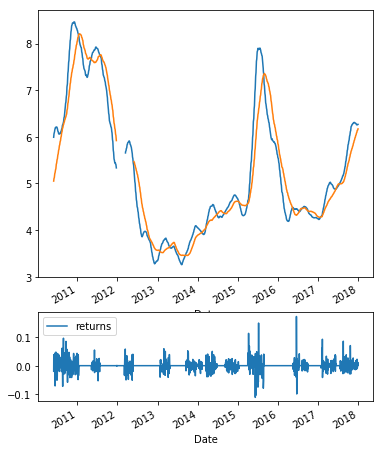

In [16]:
fig = plt.figure(figsize=(6,8))
gs = gds.GridSpec(2, 1, height_ratios=[3, 1])
ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
# hk1234_v2['Adj Close'].plot(ax=ax1, label='price')
hk1234_v2.MA50.plot(ax=ax1, label='MA(50)')
hk1234_v2.MA200.plot(ax=ax1, label='MA(200)')
hk1234_v2['returns'].plot(ax=ax2)
plt.legend()
plt.show()